In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import os
import cv2

# Data Processing (resizing) 

## Processing class

### Resizing class

In [2]:
class SimpleResizePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
        
    def preprocess(self, image):
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)
        

### Grayscaling Class

In [3]:
class SimpleGrayscalePreprocessor:
    def preprocess(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Normalization Class

In [5]:
class SimpleNormalizationPreprocessor:
    def preprocess(self, image):
        return image / 255.0

### Gaussian Blur Class

In [4]:
class GaussianBlurPreprocessor:
    def preprocess(self, image):
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
        return blurred_image

## Data Load

In [6]:
class SimpleDatasetLoader: #2nd Class
    def __init__(self, preprocessors=None):  #Constructor with parameter preprocessors initialized to none
        self.preprocessors = preprocessors #if preprocessors entered make them in a list
        if self.preprocessors is None:
            self.preprocessors = [] #if preprocessors is as initialized none make it an empty list

    def load(self, imagePaths, label, verbose=-1): #imagePaths: A list of file paths to the images that need to be loaded /label: The label to be assigned to each image.

        data = []
        labels = []
        
        for (i, imagePath) in enumerate(imagePaths): #enumerate() keeps track on the index of each image path in the list imagePaths with its corresponding index 
            if True:
                image = cv2.imread(imagePath) #cv2.imread() method reads the image path and convert it into a numpy array
                label = label

                if image is None:
                    continue

                if self.preprocessors is not None:
                    for p in self.preprocessors: #if a prprocessor is provided apply it to the image 
                        image = p.preprocess(image)        
                    data.append(image)   #add image to data list
                    labels.append(label) #add label of the image to label ist
#             except:
#                 print("rasm yuq")
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,len(imagePaths))) #print process info
            
        return (np.array(data), np.array(labels))

## Kvasir directories data processing 

### normal

In [7]:
normal = r'C:\Users\d\Downloads\PFC\Codes\kvasir\0_normal'  #
normal_label = 0
imagePaths = os.listdir(normal) #image titles in the dyed-lifted-polyps directory
imagePaths = [normal+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory normal image path = "normal + / + title"

sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_normal, normal_labels) = sdl.load(imagePaths, verbose=300, label = normal_label)
print(data_normal.shape) 
# A 4D NumPy array, with each element image being a 3-dimensional array representing an image.
#The 1st D corresponds to the different images 500.
#The 2nd D represents the rows (height) of each image.
#The 3rd D represents the columns (width) of each image.
#The 4th D represents the RGB color channels (Red, Green, Blue) of each pixel in the image. 
data = data_normal.reshape((data_normal.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels 
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\d\\Downloads\\PFE\\kvasir\\0_normal'

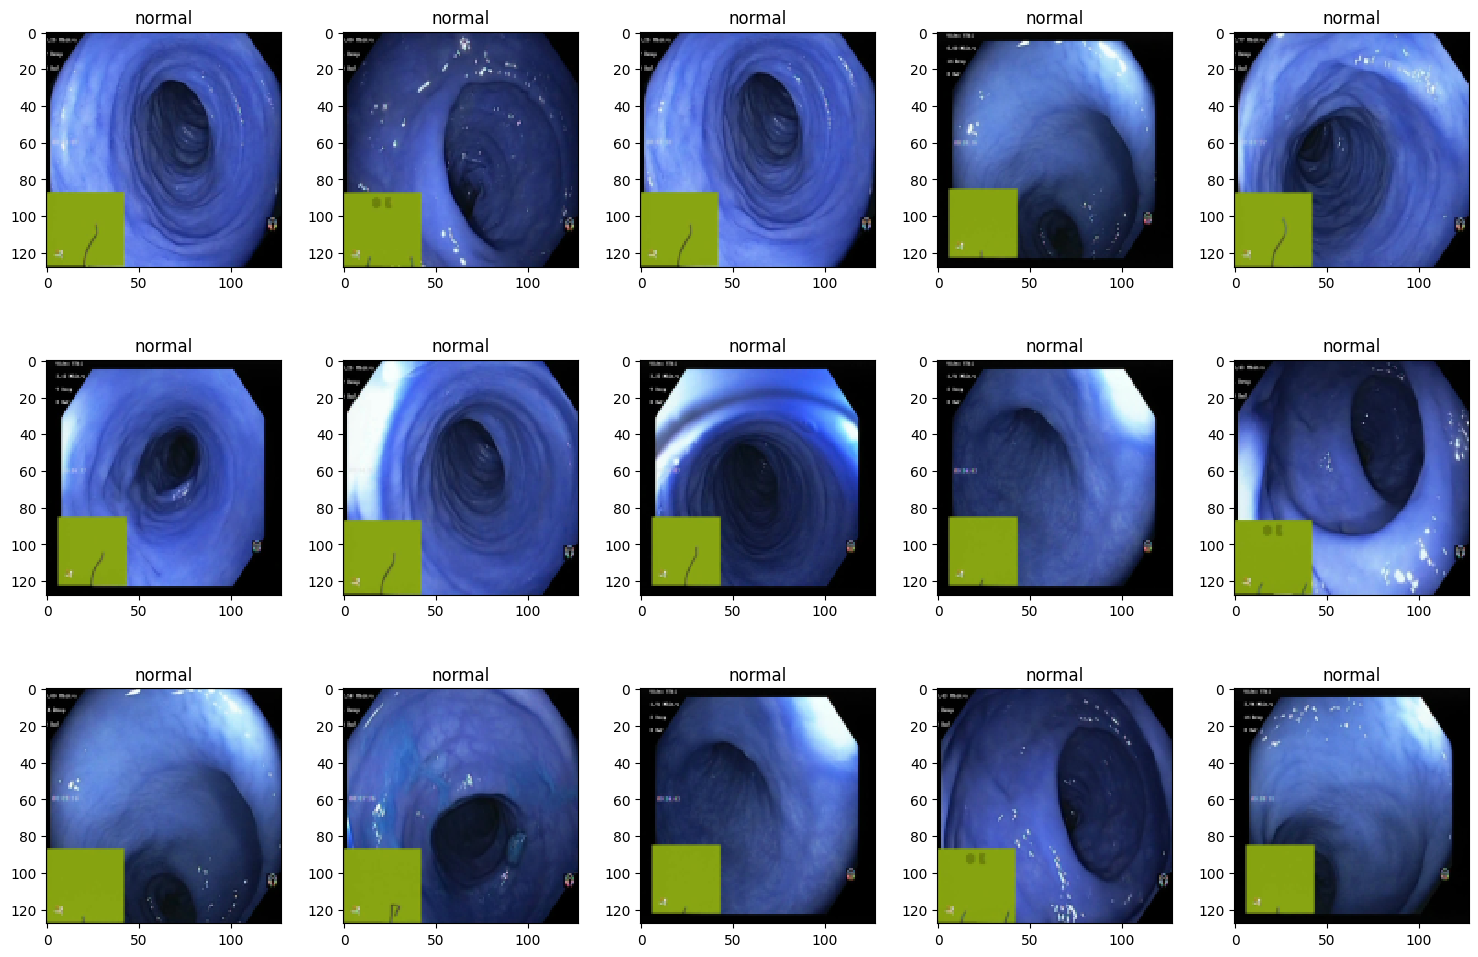

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.tight_layout() # add spacing between subplots
for ax in axes.flat:
    y = np.random.randint(400)
    ax.imshow(np.asarray(data_normal[y]).reshape(128,128, 3), interpolation='nearest', cmap='gray')
    ax.set_title("normal")
    
plt.show()

In [20]:
ulcerative_colitis = r'C:\Users\d\Downloads\PFE\kvasir\1_ulcerative_colitis'
ulcerative_colitis_label = 1
imagePaths = os.listdir(ulcerative_colitis) #image titles in the dyed_resection_margins directory
imagePaths = [ulcerative_colitis+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory

sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, spn])
(data_ulcerative_colitis, ulcerative_colitis_labels) = sdl.load(imagePaths, verbose=300, label = ulcerative_colitis_label)
print(data_ulcerative_colitis.shape)
data = data_ulcerative_colitis.reshape((data_ulcerative_colitis.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128= 16384Total Number of pixels CASE OF GRASCALED 
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 300/1500
[INFO] processed 600/1500
[INFO] processed 900/1500
[INFO] processed 1200/1500
[INFO] processed 1500/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


In [21]:
polyps = r'C:\Users\d\Downloads\PFE\kvasir\2_polyps' #polyps
polyps_label = 2
imagePaths = os.listdir(polyps) #image titles in the polyps directory
imagePaths = [polyps+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory 
sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_polyps, polyps_labels) = sdl.load(imagePaths, verbose=300, label = polyps_label)
print(data_polyps.shape)
data = data_polyps.reshape((data_polyps.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels 
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 300/1500
[INFO] processed 600/1500
[INFO] processed 900/1500
[INFO] processed 1200/1500
[INFO] processed 1500/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


In [22]:
esophagitis = r'C:\Users\d\Downloads\PFE\kvasir\3_esophagitis' #esophagitis
esophagitis_label = 3
imagePaths = os.listdir(esophagitis) #image titles in the esophagitis directory
imagePaths = [esophagitis+"/"+i for i in imagePaths] #each image path by concatinanting the title with the directory 
sp = SimpleResizePreprocessor(128, 128)
spg = SimpleGrayscalePreprocessor()
spn = SimpleNormalizationPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp,spn])
(data_esophagitis, esophagitis_labels) = sdl.load(imagePaths, verbose=300, label = esophagitis_label)
print(data_esophagitis.shape)
data = data_esophagitis.reshape((data_esophagitis.shape[0], -1))# 49152 = Total number of features = 128(width)*128(hight)*3(RGBchannels)// 128*128=Total Number of pixels 
print(data.shape)
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1024.0)))

[INFO] processed 300/1500
[INFO] processed 600/1500
[INFO] processed 900/1500
[INFO] processed 1200/1500
[INFO] processed 1500/1500
(1500, 128, 128, 3)
(1500, 49152)
[INFO] features matrix: 562.5MB


              dataset  count_of_images
0         esophagitis             1500
1              normal             1500
2              polyps             1500
3  ulcerative_colitis             1500


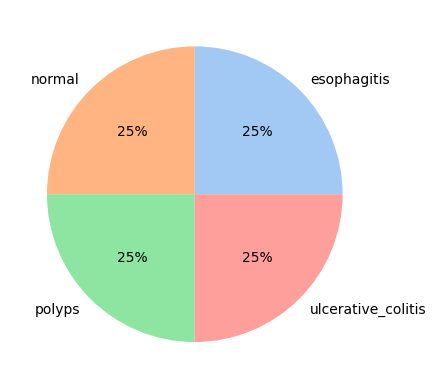

In [23]:
df = pd.DataFrame({
    'dataset': ['esophagitis', 'normal', 'polyps', 'ulcerative_colitis'],
    'count_of_images': [len(data_esophagitis), len(data_normal), len(data_polyps), len(data_ulcerative_colitis)]})

# Pie chart to display data distribution
# px.pie(df, values='count', names='labels', title='Data distribution')
color = sns.color_palette('pastel')
plt.pie(df['count_of_images'], labels = df.dataset, colors = color, autopct='%.0f%%')

print(df)
plt.show()

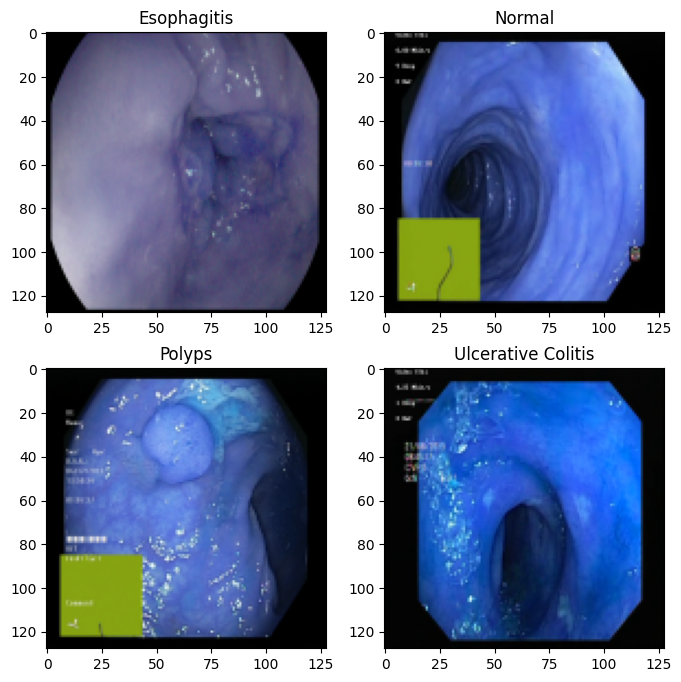

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
datasets = [(data_esophagitis, 'Esophagitis'), (data_normal, 'Normal'), (data_polyps, 'Polyps'), (data_ulcerative_colitis, 'Ulcerative Colitis')]

for ax, (dataset, label) in zip(axes.flat, datasets):
    ax.imshow(dataset[0], cmap='gray')  # Plot the first preprocessed image
    ax.set_title(label)

plt.show()

In [25]:
print("Sample labels from each dataset:")
print("Esophagitis labels:", esophagitis_labels[:5])
print("Normal labels:", normal_labels[:5])
print("Polyps labels:", polyps_labels[:5])
print("Ulcerative colitis labels:", ulcerative_colitis_labels[:5])

Sample labels from each dataset:
Esophagitis labels: [3 3 3 3 3]
Normal labels: [0 0 0 0 0]
Polyps labels: [2 2 2 2 2]
Ulcerative colitis labels: [1 1 1 1 1]


In [26]:
final_data = np.concatenate([data_esophagitis, data_normal, data_polyps, data_ulcerative_colitis])
final_labels = np.concatenate([esophagitis_labels, normal_labels, polyps_labels, ulcerative_colitis_labels])
print(final_data.shape)
print("[INFO] features matrix: {:.1f}MB".format(final_data.nbytes / (1024 * 1024.0)))

(6000, 128, 128, 3)
[INFO] features matrix: 2250.0MB


In [27]:
(x_train, x_test, y_train, y_test) = train_test_split(final_data, final_labels, test_size=0.30, random_state=100) 

# 30% of data for testing  and 70% for training
# x_train (training data), x_test (testing data), y_train (training labels), and y_test (testing labels)
# random_state to make the random split the same every time the code is run, ensuring consistent results.

In [28]:
print(x_train.shape)
print(y_train.shape)

(4200, 128, 128, 3)
(4200,)


In [29]:
x_train = x_train.reshape(x_train.shape[0], -1)#-1 automatically infer the value 128*128*3 = value of the features to make it 2D instead of 4D
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)
print(x_test.shape)

(4200, 49152)
(1800, 49152)


In [30]:
# Initialize KNeighborsClassifier with different hyperparameters and k values
k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')

    # Fit the model on the training data
    knn.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"KNN Classifier with k={k}, Accuracy: {accuracy:.2f}")

KNN Classifier with k=3, Accuracy: 0.88
KNN Classifier with k=5, Accuracy: 0.87
KNN Classifier with k=7, Accuracy: 0.86


In [31]:
y_pred=knn.predict(x_test) #These are the predicted output values
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

confusion Matrix:
[[449   0   0   0]
 [ 60 326  61  18]
 [ 40  66 307   7]
 [  0   0   0 466]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       449
           1       0.83      0.70      0.76       465
           2       0.83      0.73      0.78       420
           3       0.95      1.00      0.97       466

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.85      1800
weighted avg       0.86      0.86      0.85      1800

Accuracy: 0.86


confusion matrix:

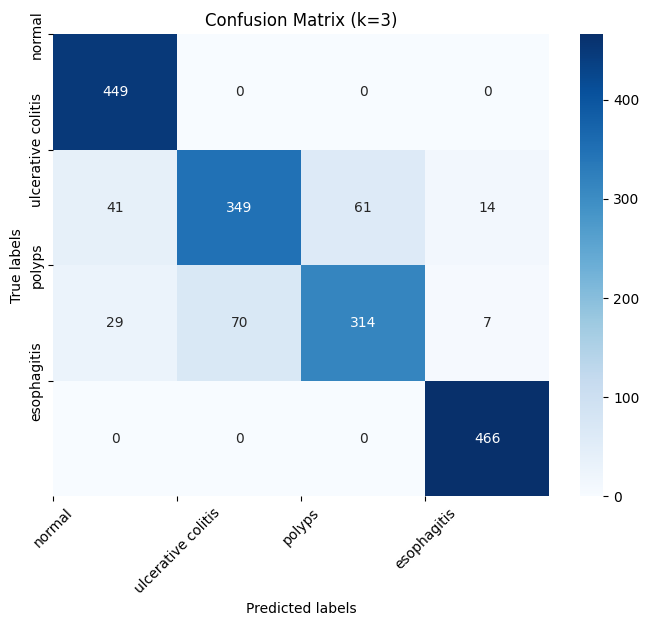

[[449   0   0   0]
 [ 41 349  61  14]
 [ 29  70 314   7]
 [  0   0   0 466]]


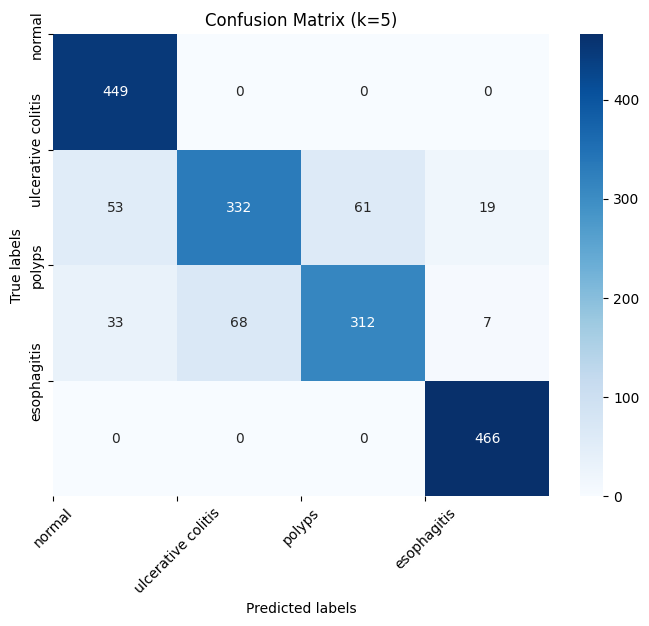

[[449   0   0   0]
 [ 53 332  61  19]
 [ 33  68 312   7]
 [  0   0   0 466]]


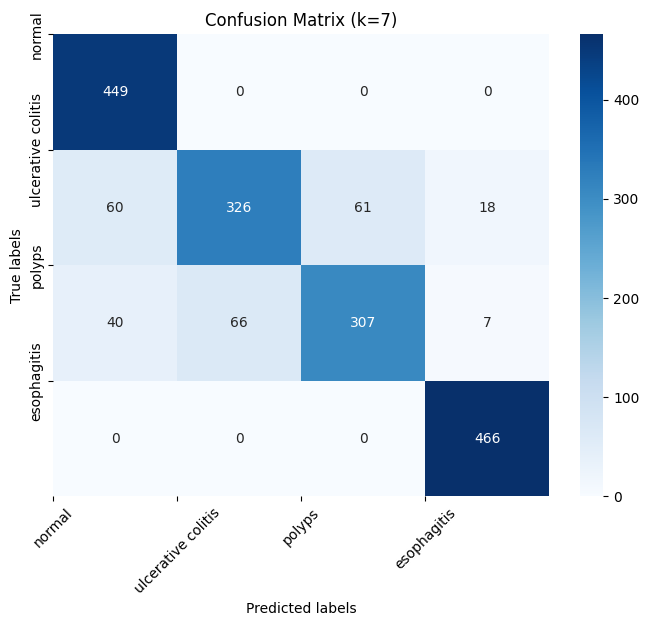

[[449   0   0   0]
 [ 60 326  61  18]
 [ 40  66 307   7]
 [  0   0   0 466]]


In [32]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

k_values = [3, 5, 7]
classes = ['normal', 'ulcerative colitis', 'polyps', 'esophagitis']

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap for visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    # Set labels, title, and ticks
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix (k={k})')
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)

    # Show the plot
    plt.show()
    print (cm)